In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import fasttext
import bz2
import csv
from sklearn.metrics import roc_auc_score
import os

In [2]:
hair_dryer=pd.read_csv('hair_dryer.tsv', sep='\t',header=0,index_col='review_id')
microwave=pd.read_csv('microwave.tsv', sep='\t',header=0,index_col='review_id')
pacifier=pd.read_csv('pacifier.tsv', sep='\t',header=0,index_col='review_id')
col_names = ["customer_id","product_parent","star_rating","helpful_votes","vine","verified_purchase","total_votes",
             "review_headline","review_body","review_date"]
data_names = ["hair_dryer","microwave","pacifier"]
data_total = [hair_dryer,microwave,pacifier]
for i,name in enumerate(data_names):
    data_total[i] = data_total[i][col_names]

In [3]:
for i,name in enumerate(data_names):
    print(name,"desc")
    print(f"The number of {name} data",len(name))
    print(data_total[i].describe())
    print("The number of star_rating",len(data_total[i]["star_rating"][(data_total[i]["star_rating"]<=5) & (data_total[i]["star_rating"]>=1)]))
    print("The useful number of total_votes",len(data_total[i]["total_votes"][data_total[i]["total_votes"]!=0]))
    print()

hair_dryer desc
The number of hair_dryer data 10
        customer_id  product_parent   star_rating  helpful_votes   total_votes
count  1.147000e+04    1.147000e+04  11470.000000   11470.000000  11470.000000
mean   2.815122e+07    4.846338e+08      4.116042       2.179076      2.563296
std    1.523877e+07    2.873240e+08      1.300333      14.241304     15.382528
min    1.246400e+04    4.239600e+05      1.000000       0.000000      0.000000
25%    1.491441e+07    2.351060e+08      4.000000       0.000000      0.000000
50%    2.707123e+07    4.867740e+08      5.000000       0.000000      0.000000
75%    4.233644e+07    7.322523e+08      5.000000       1.000000      1.000000
max    5.309637e+07    9.994366e+08      5.000000     499.000000    575.000000
The number of star_rating 11470
The useful number of total_votes 4329

microwave desc
The number of microwave data 9
        customer_id  product_parent  star_rating  helpful_votes  total_votes
count  1.615000e+03    1.615000e+03  1615.0000

In [18]:
def vis_data(data,name=None):
    sns.set(rc={'figure.facecolor':'white'})
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'

    print("there is any null data or not:",data.isnull().any().any())
    print("adding a length column for analyzing the length of the reviews")
    data.dropna(inplace=True)
    data['review_body_length'] = data['review_body'].apply(len)
    # 这里会出错，所以没有考虑评论的标题
#     data['review_headline_length'] = data['review_headline'].apply(len)
#     data.groupby('length').describe().sample(10)
    print(data.groupby('star_rating').describe())
    ratings = data["star_rating"].value_counts()
    label_rating = ratings.index
    size_rating = ratings.values
    
    colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

    rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = f'{name}', hole = 0.3)

    df = [rating_piechart]

    layout = go.Layout(title = f'Distribution of Ratings for {name}',plot_bgcolor='#ffffff',paper_bgcolor='#ffffff')

    fig = go.Figure(data = df,
                 layout = layout)
    plt.savefig('1.png',dpi=200, bbox_inches='tight')
    py.iplot(fig)
    
    
    ####################################################条形图
    color = plt.cm.copper(np.linspace(0, 1, 20))
    print()
    data['product_parent'].value_counts()[:20].plot.bar(color = color, figsize = (15, 9),colormap="#ffffff")
    plt.title(f'Distribution of {name} in kinds(1-20st)', fontsize = 20)
    plt.xlabel(f'{hair_dryer} kind')
    plt.ylabel('count')
    plt.tick_params(labelsize=25) #刻度字体大小13
    plt.savefig('1.png',dpi=200, bbox_inches='tight')
    plt.show()
    
    
    #####################################################饼形
    verified_purchase = data['verified_purchase'].value_counts()

    label_verified_purchase = verified_purchase.index
    size_verified_purchase = verified_purchase.values

    colors = ['yellow', 'lightgreen']

    feedback_piechart = go.Pie(labels = label_verified_purchase,
                         values = size_verified_purchase,
                         marker = dict(colors = colors),
                         name = f'{name}', hole = 0.3)

    df2 = [feedback_piechart]

    layout = go.Layout(
           title = f'Distribution of verified_purchase for {name}',plot_bgcolor='#ffffff',paper_bgcolor='#ffffff')

    fig = go.Figure(data = df2,
                 layout = layout)

    py.iplot(fig)
    
    
    # 统计图
    sns.set_style("whitegrid")
    data['review_body_length'].value_counts().plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
    plt.title('Distribution of Length in Reviews')
    plt.xlabel('lengths')
    plt.ylabel('count')
    plt.tick_params(labelsize=25) #刻度字体大小13
    plt.savefig('2.png',dpi=200, bbox_inches='tight')
    plt.show()
    
    
#     print("Let's Check some of the reviews according to thier lengths")
#     print(data[data['review_body_length'] == 1]['review_body'].iloc[0])
#     print(data[data['review_body_length'] == 21]['review_body'].iloc[0])
#     print(data[data['review_body_length'] == 50]['review_body'].iloc[0])
#     print(data[data['review_body_length'] == 150]['review_body'].iloc[0])
    
    ### 绘制一个奇怪的图性
    plt.rcParams['figure.figsize'] = (15, 9)
    plt.style.use('fivethirtyeight')
    
    print(data['product_parent'].value_counts()[:70])
    namess = data['product_parent'].value_counts()[:20].index.tolist()
    p_data = data.loc[data["product_parent"].isin(namess)]
    sns.set(rc={'figure.facecolor':'white'})
    sns.set_style("whitegrid")
    sns.boxenplot(p_data['product_parent'], p_data['star_rating'], palette = 'spring')
#     plt.title("product_kind vs star_ratings")
    plt.xticks(rotation = 90)
    plt.tick_params(labelsize=25) #刻度字体大小13
    plt.savefig('3.png',dpi=200, bbox_inches='tight')
    plt.show()
    
    
    
    # 绘制散点图
    plt.rcParams['figure.figsize'] = (15, 9)
    plt.style.use('fivethirtyeight')
    sns.set_style("whitegrid")
    sns.swarmplot(p_data['product_parent'], data['review_body_length'], palette = 'deep')
#     plt.title("product kind vs Length of Ratings")
    plt.xticks(rotation = 90)
    plt.tick_params(labelsize=25) #刻度字体大小13
    plt.savefig('4.png',dpi=200, bbox_inches='tight')
    plt.show()
    
    
    ## 绘制奇怪图二
    import warnings
    warnings.filterwarnings('ignore')

    plt.rcParams['figure.figsize'] = (12, 7)
    plt.style.use('fivethirtyeight')
    
    sns.set_style("whitegrid")
    sns.violinplot(data['verified_purchase'], data['star_rating'], palette = 'cool')
#     plt.title("verified_purchase wise Mean Ratings")
    plt.tick_params(labelsize=25) #刻度字体大小13
    plt.savefig('5.png',dpi=200, bbox_inches='tight')
    plt.show()
    
    
    ### 绘制箱线图
    warnings.filterwarnings('ignore')

    plt.rcParams['figure.figsize'] = (12, 7)
    plt.style.use('fivethirtyeight')
    sns.set_style("whitegrid")
    sns.boxplot(data['star_rating'], data['review_body_length'], palette = 'Blues')
#     plt.title("review_body_length vs star_rating")
    plt.tick_params(labelsize=25) #刻度字体大小13
    plt.savefig('6.png',dpi=200, bbox_inches='tight')
    plt.show()
    
    
    from sklearn.feature_extraction.text import CountVectorizer
    
    # 进行词频的统计
    cv = CountVectorizer(stop_words = 'english')
    words = cv.fit_transform(data.review_body)
    sum_words = words.sum(axis=0)


    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

    plt.style.use('fivethirtyeight')
    color = plt.cm.ocean(np.linspace(0, 1, 20))
    sns.set_style("whitegrid")
    frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
#     plt.title("Most Frequently Occuring Words - Top 20")
    plt.savefig('7.png',dpi=200, bbox_inches='tight')
    plt.tick_params(labelsize=25) #刻度字体大小13
    plt.show()

    
    
    ## 词云图
    from wordcloud import WordCloud

    wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    sns.set_style("whitegrid")
    plt.imshow(wordcloud)
#     plt.title("Vocabulary from Reviews", fontsize = 20)
    plt.savefig('8.png',dpi=200, bbox_inches='tight')
    
    plt.show()

    namesss = data['product_parent'].value_counts()[:5].index.tolist()
    pp_data = data.loc[data["product_parent"].isin(namesss)]
    print(frequency.head(20))
    trace = go.Scatter3d(
    x = data['review_body_length'],
    y = data['star_rating'],
    z = pp_data['product_parent'],
    mode='markers',
    name = name,
    marker=dict(
        size=10,
        color = data['star_rating'],
        colorscale = 'Viridis',))
    df = [trace]
    layout = go.Layout(
        title = 'Length vs Frequency word vs Ratings',plot_bgcolor='#ffffff',paper_bgcolor='#ffffff',
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0  ) )
    fig = go.Figure(data = df, layout = layout)
    iplot(fig)

there is any null data or not: False
adding a length column for analyzing the length of the reviews
            customer_id                                                     \
                  count          mean           std       min          25%   
star_rating                                                                  
1                1032.0  2.988996e+07  1.507119e+07   32192.0  16347130.25   
2                 639.0  3.013211e+07  1.513969e+07  139704.0  15752999.50   
3                 999.0  2.895417e+07  1.531671e+07   92698.0  15309833.00   
4                2095.0  2.802716e+07  1.519079e+07   58338.0  14803166.00   
5                6703.0  2.761288e+07  1.523959e+07   12464.0  14576620.00   

                                                product_parent                \
                    50%         75%         max          count          mean   
star_rating                                                                    
1            29290557.0  43958092.5

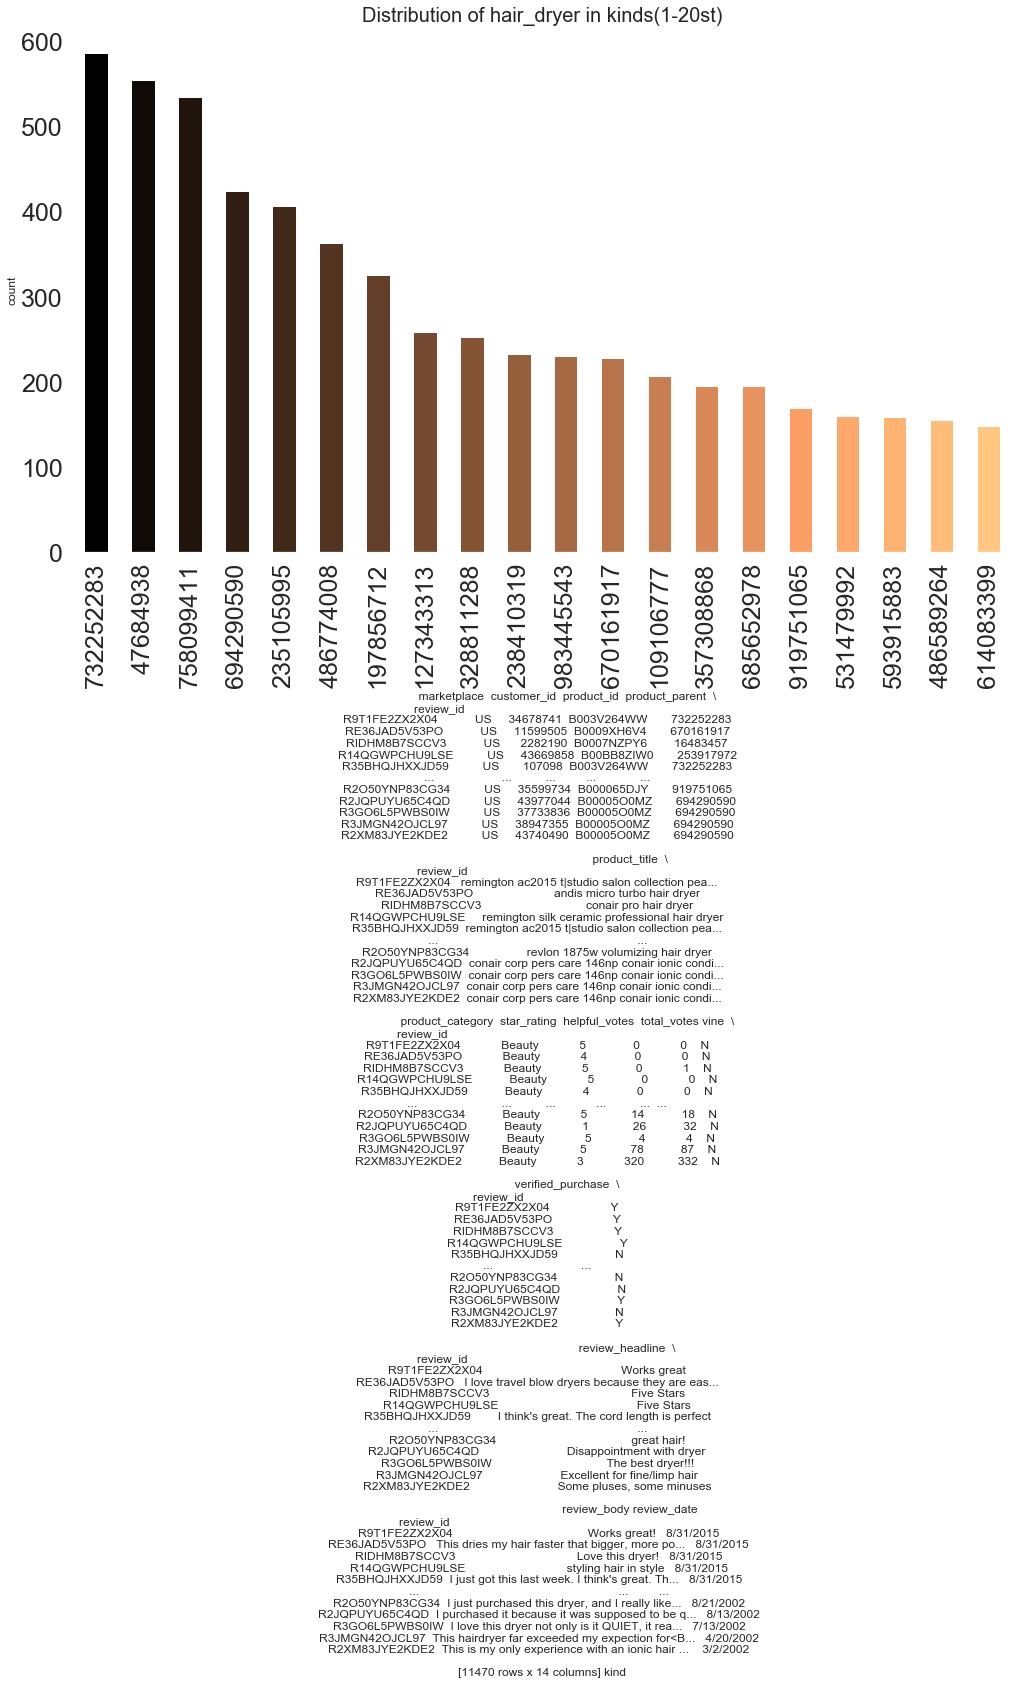

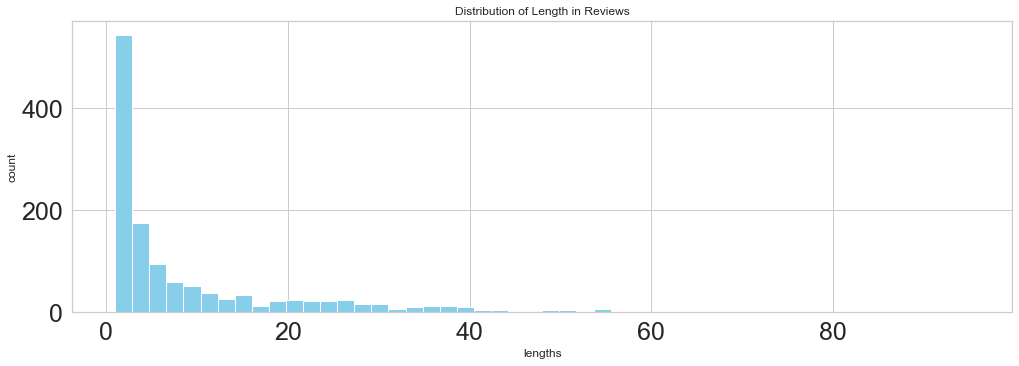

732252283    587
47684938     555
758099411    535
694290590    424
235105995    407
            ... 
619941271     44
415057628     44
153523919     44
453645026     44
711329162     43
Name: product_parent, Length: 70, dtype: int64


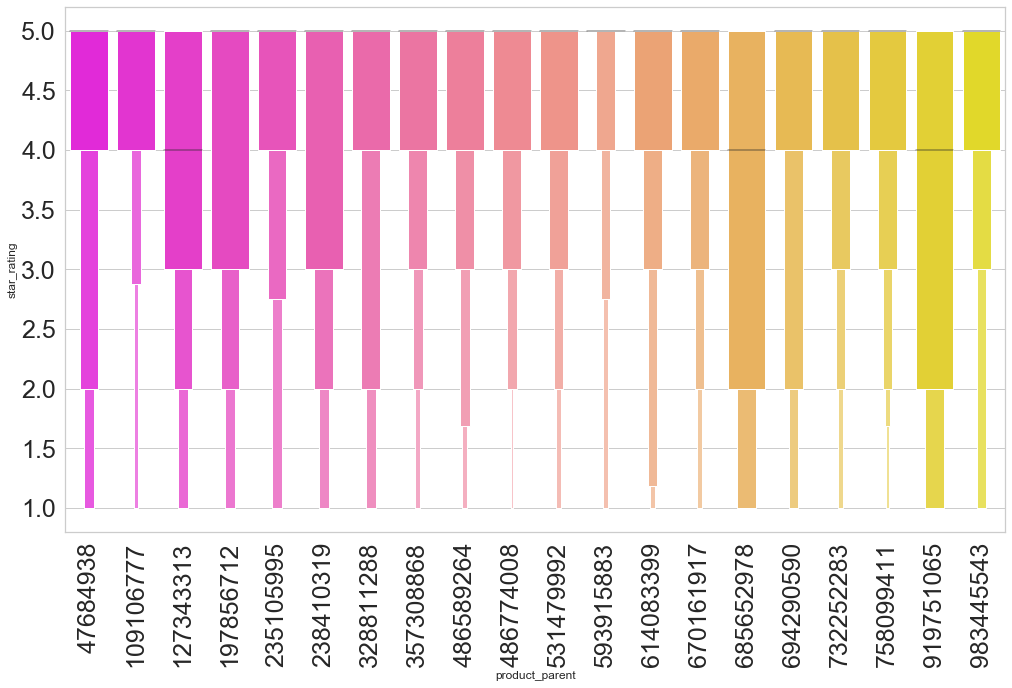

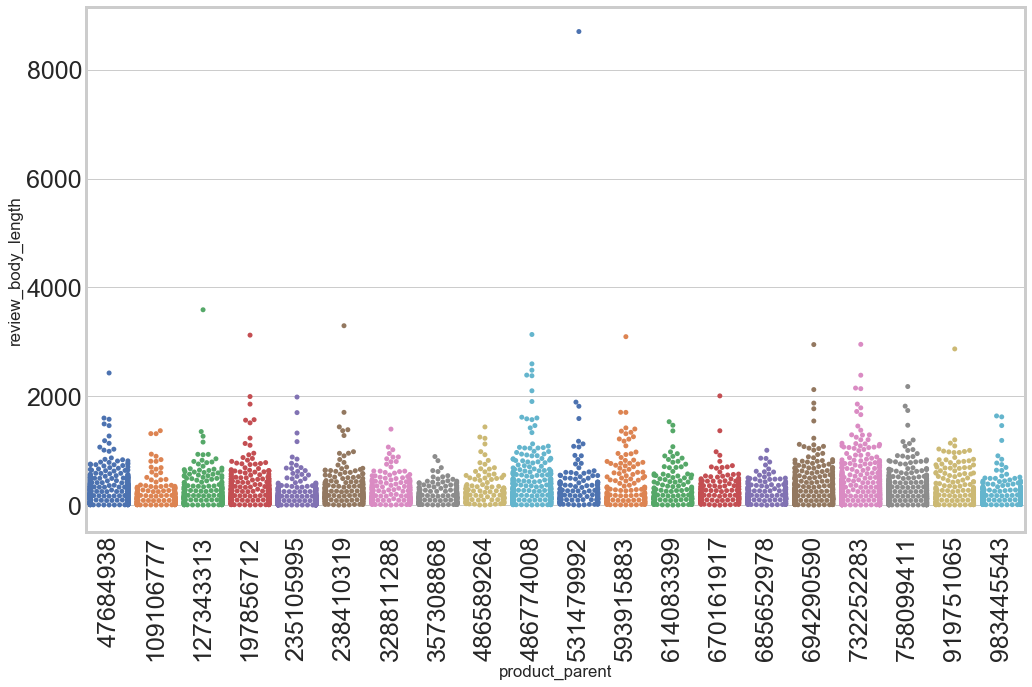

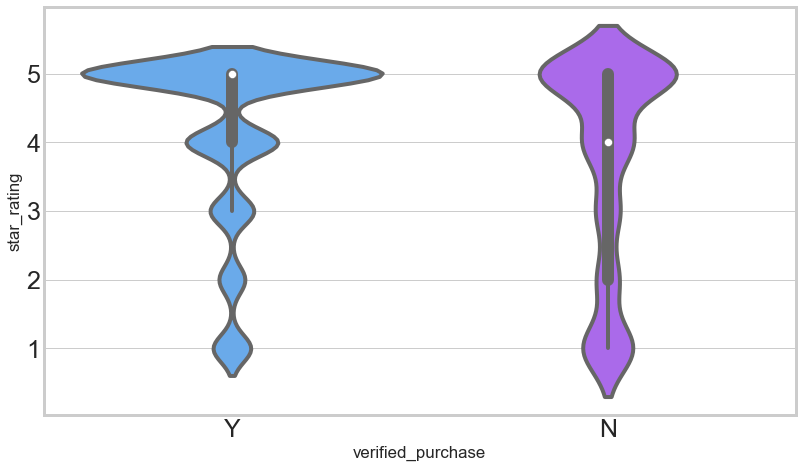

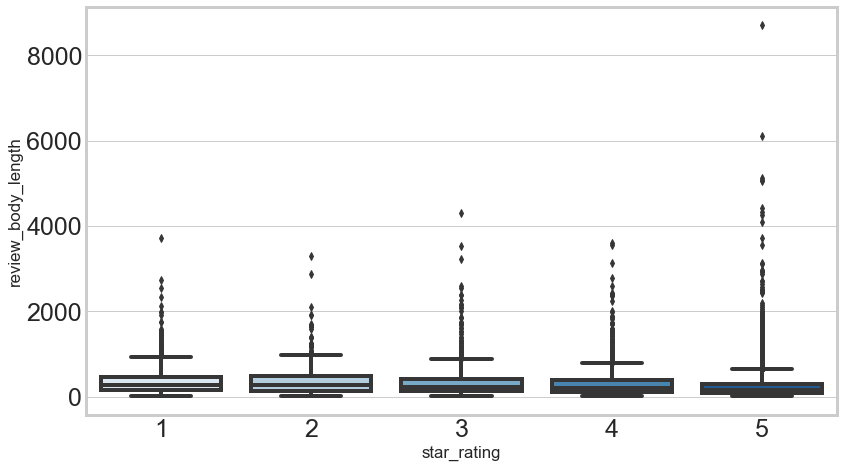

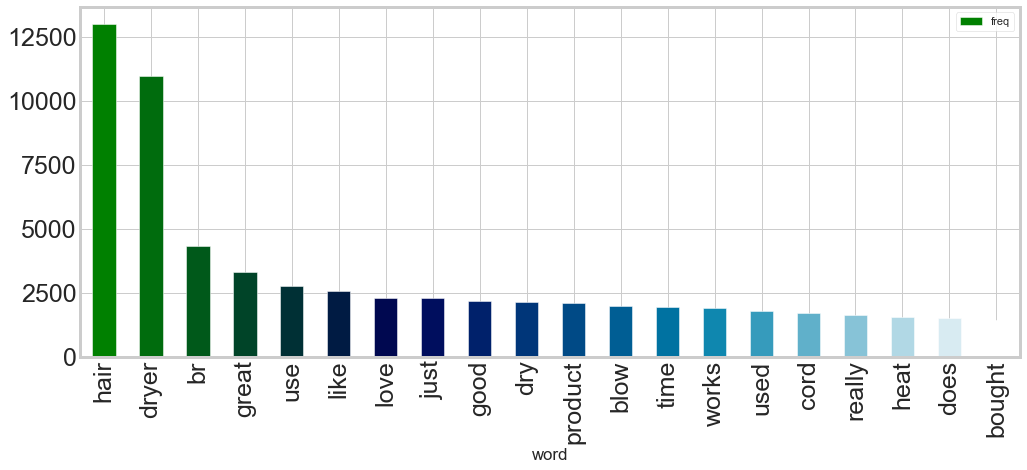

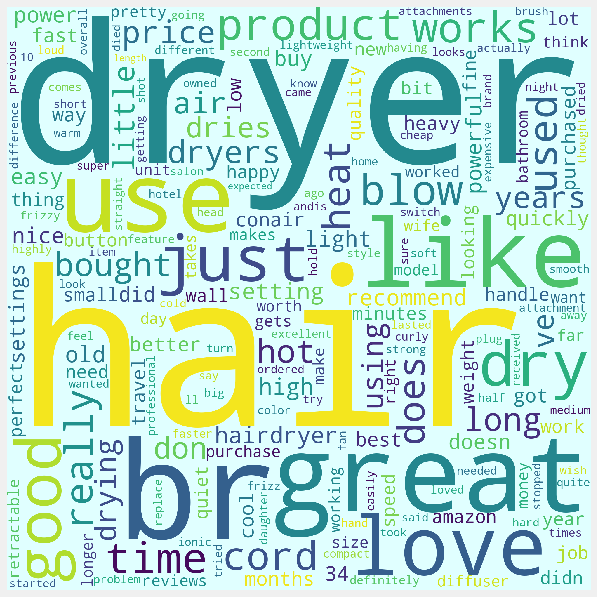

       word   freq
0      hair  13023
1     dryer  10961
2        br   4337
3     great   3312
4       use   2763
5      like   2579
6      love   2291
7      just   2284
8      good   2190
9       dry   2153
10  product   2107
11     blow   1968
12     time   1957
13    works   1918
14     used   1798
15     cord   1701
16   really   1632
17     heat   1567
18     does   1520
19   bought   1439


In [19]:
vis_data(data_total[0],data_names[0])

By looking at the above pie chart, we can infer that most of the Ratings are good for alexa. Around 72.6% people have given Alexa 5 Star rating, which is very good. 14.4% people have given Alexa a 4 Star Rating, which is also good. that means 72.6+14.4 = 87% people have given alexa good rating.
4.38% people have given alexa an average rating of 3 stars. 3.05% people did not like alexa and chose to give only 2 star ratings to alexa whereas 5.11% people hated alexa and decided to give alexa only 1 Star Rating. This a total of 3.05+5.11 = 8.16% people did not like alexa.
----- **这里是关于饼形图形的描述可以参考**

The above Bar plot, plots the different Variatios of Amazon Alexa with their popularity or no. of counts. It is quite clear that Black Dot is the most popular variation of Amazon Alexa with more than 500 units out of 3150 samples, which is really good.

Charcoal Fabric and Configuration: Fire TV Stick are also good and very much popular after Black dot. Whereas Oak Fish and Walnut Finish are very Unpopular with less than 10 entries.
----- **这里是关于条形图形的描述可以参考**

Here again we are going to analyze the Pie Chart representing the Distribution of feedback for Amazon Alexa which says that around 92% people gave a positive feedback to Amazon Alexa and only 8% people gave negative feedback to Amazon Alexa. This Suggests that Amazon Alexa is a popular product amongst so many people and only few people did not like it for some unforeseeable factors. ----- **这里是关于第二饼形图形的描述可以参考**

The above Distribution Plot, shows a distribution of Length of the Reviews written by the people. This is to show on an average what is the length of the reviews written by the people for amazon alexa. Most of the Reviews are so short that is only One or Two words longer. We can see that most people write reviwes that is 5-20 words longer.

Very few people write longer reviews such as 70-80 words.----- **这里是关于第二个评论长度条形图形的描述可以参考**

The above Bivariate plot, which plots kind and ratings to check which of the kindn of Amazon Alexa has been perfoeming best in terms of ratings.

Walnut finish and Oak Finish have very high ratings, the ratings rangee from 4.5 to 5 which is really impressive, These kind are rare and have high reviews.

White and Black kind for Amazon Alexa have low ratings also, as it is the most common variation available for the product that is the reason, why it has ratings varying from 0 to 5..**这里是关于第一个奇观的图形的描述可以参考**

The above Bivariate plot shows swarmplot between kind in Amazon Alexa and Length of the Reviews. We would like to see for which of the model variations of Amaozn Alexa people have written the longest reviews. By looking at the graph, we can easily spot that the longest review was written for Black Plus. then Black Spot has two long reviews and Black, and Black plus variation also has a very long review. we might conclude that the longest reviews are all written for the Black-type kind in Amazon Alexa.
**这里是关于散点图形的描述可以参考**


The above Bi-variate plot, shows a violin plot between Feedback and Rating, We can easily conclude that the Products which have 0 feedback have lower ratings ranging from 1 to 2 (more probably Rating is 1) whereas for the products having a feedback value 1, has ratings ranging from 3 to 5(more probably rating is 5).**这里是关于第二个奇怪的描述可以参考**

The above Bivariate plot shows a plot between Rating and Length, We would like to that how much a user is gonna write if he/she is going to give a low rating or a high rating to the product.

We can see that most of the people who gave 5 star rating to Alexa wrote a very small review in comparison to the people who did not give alexa a 5 star rating. But, the longest reviews are written for the 5 star ratings only. The people who gave alexa, a low rating such as 1 or 2 star rating did not consider writing a longer review maybe because they do not like the product.**这里是关于箱线图的描述可以参考**

The Above Bar plot represents the most frequnt words in the reviews so that we can get a rough idea about the reviews and what people think of the product.

We can see that love is the most frequent word in the word suggesting that most of the people absolutely love alexa. Other frequent words that suggest alexa is doing well are amazing, like, great, works etc.
**这里是关于词频图的描述可以参考**

In [ ]:
def process_data(data,name=None):
    print(name,"desc")
    print(f"The number of {name} data",len(data))
    print(f"The {name} number of star_rating",len(data["star_rating"][(data["star_rating"]<=5) & (data["star_rating"]>=1)]))
    
    # 首先去除total_votes=0的 |(data["vine"]=='Y')
    data = data[(data["total_votes"]!=0)]
    print(f"The {name} useful number of total_votes",len(data))
    # 在对于help_votes/total_votes
    data["helpful_acc"] = data["helpful_votes"] / data["total_votes"]
    data = data[(data["helpful_acc"]>=0.5)]
    print(f"The {name} useful number of helpful_acc",len(data))
    # 在对于是否已经购买
    data = data[(data["verified_purchase"] == 'Y')]
    print(f"The {name} useful number of verified_purchase",len(data))
    # 可视化数据
    vis_data(data,"hair_dryer")
    
    from sklearn.model_selection import train_test_split
    X_train,X_test, y_train, y_test =train_test_split(data["review_body"],data["star_rating"],test_size=0.1,random_state=777)
    with open("train.txt",'w',encoding='utf8') as f:
        for n_i in range(len(X_train)):
            f.write(str("__label__"+str(int(y_train[n_i]))+" "+X_train[n_i])+"\n")
        f.close()
    with open("test.txt",'w',encoding='utf8') as ff:
        for n_i in range(len(X_test)):
            ff.write(str("__label__"+str(int(y_test[n_i]))+" "+X_test[n_i])+"\n")
    # Data Prep
    return None

In [ ]:
credit_data = process_data(data_total[0],"hair_dryer")

**这里说明的是如何获得可信度高的训练数据** 
### 1. 首先如果vine=Y，也就是亚马逊会员的话，我们默认其评论都是真实的
### 2. 然后是选择total_votes不为0的评论数据的较为可信的评论数据
### 3. 在是使用定义的标准（heldpllopful_vitotes / total_vote）>=0.5,认为是较为可信的
### 4. 然后就是通过是否购买商品，这里选择的是已经购买商品的，评论才最可靠的
### 通过4层的较为可信的，层层筛选，可以得到认为是评论和用户评价非常可靠的评论数据

In [ ]:
data = pd.read_table("train.txt")
data.to_csv("train.txt", index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

# Modelling
# This routine takes about 5 to 10 minutes 
model = fasttext.train_supervised('train.txt',label_prefix='__label__', thread=4, epoch = 400)

print(model.labels, 'are the labels or targets the model is predicting')

In [ ]:
test_data = pd.read_table('test.txt').values
# To run the predict function, we need to remove the __label__1 and __label__2 from the testset.  
new = [w[0].replace('__label__1 ', '') for w in test_data.tolist()]
new = [w.replace('__label__2 ', '') for w in new]
new = [w.replace('__label__3 ', '') for w in new]
new = [w.replace('__label__4 ', '') for w in new]
new = [w.replace('__label__5 ', '') for w in new]
new = [w.replace('\n', '') for w in new]
# Use the predict function 
pred = model.predict(new)
# check the first record outputs
print(pred[0][0], 'is the predicted label')
print(pred[0][1], 'is the probability score')
# all_len = len(test_data)
# print(all_len)
# cnt = 0
label_test = []
label_score = []
for i,tr in enumerate(pred[:][0]):
    label_score.append(int(tr[0].split("__")[2].split(" ")[0]))
    label_test.append(int(test_data[i][0].split("__")[2].split(" ")[0]))


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
print('accuracy:{}'.format(accuracy_score(label_test, label_score)))
print('precision:{}'.format(precision_score(label_test, label_score,average='micro')))
print('recall:{}'.format(recall_score(label_test, label_score,average='micro')))
print('f1-score:{}'.format(f1_score(label_test, label_score,average='micro')))

## 方法二 使用传统的词袋的方式

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
def process_data2(data,name=None):
    print(name,"desc")
    print(f"The number of {name} data",len(data))
    print(f"The {name} number of star_rating",len(data["star_rating"][(data["star_rating"]<=5) & (data["star_rating"]>=1)]))
    
    # 首先去除total_votes=0的 |(data["vine"]=='Y')
    data = data[(data["total_votes"]!=0)]
    print(f"The {name} useful number of total_votes",len(data))
    # 在对于help_votes/total_votes
    data["helpful_acc"] = data["helpful_votes"] / data["total_votes"]
    data = data[(data["helpful_acc"]>=0.5)]
    print(f"The {name} useful number of helpful_acc",len(data))
    # 在对于是否已经购买
    data = data[(data["verified_purchase"] == 'Y')]
    print(f"The {name} useful number of verified_purchase",len(data))
    # 可视化数据
#     vis_data(data,"hair_dryer")
    corpus = []
    for i in range(0, 2754):
        review = re.sub('[^a-zA-Z]', ' ', data['review_body'][i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
        
    # creating bag of words
    from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

    cv = CountVectorizer(max_features = 2500)

    x = cv.fit_transform(corpus).toarray()
    y = data["star_rating"].values

    print(x.shape)
    print(y.shape)
    
    from sklearn.model_selection import train_test_split

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 15)

    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)
    from sklearn.preprocessing import MinMaxScaler

    mm = MinMaxScaler()

    x_train = mm.fit_transform(x_train)
    x_test = mm.transform(x_test)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix

    model = RandomForestClassifier()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print("Training Accuracy :", model.score(x_train, y_train))
    print("Testing Accuracy :", model.score(x_test, y_test))

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

    print("Accuracy :", accuracies.mean())
    print("Standard Variance :", accuracies.std())
    
    params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]}
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import StratifiedKFold

    cv_object = StratifiedKFold(n_splits = 2)

    grid = GridSearchCV(estimator = model, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
    grid.fit(x_train, y_train.ravel())
    
    print("Best Parameter Combination : {}".format(grid.best_params_))
    
    print("Mean Cross Validation Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
    print("Mean Cross Validation Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

    from sklearn.metrics import accuracy_score
    print("Accuracy Score for Test Set :", accuracy_score(y_test, y_pred))
    
    model = RandomForestClassifier(bootstrap=True,max_depth=100, min_samples_split= 8,n_estimators=100)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print("Training Accuracy :", model.score(x_train, y_train))
    print("Testing Accuracy :", model.score(x_test, y_test))
    print('accuracy:{}'.format(accuracy_score(y_test, y_pred)))
    print('precision:{}'.format(precision_score(y_test, y_pred,average='micro')))
    print('recall:{}'.format(recall_score(y_test, y_pred,average='micro')))
    print('f1-score:{}'.format(f1_score(y_test, y_pred,average='micro')))

In [ ]:
credit_data2 = process_data2(data_total[0],"hair_dryer")

### 方案三 加入不同的评价评分的正确性

In [ ]:
def process_data3(data,name=None):
    print(name,"desc")
    print(f"The number of {name} data",len(data))
    print(f"The {name} number of star_rating",len(data["star_rating"][(data["star_rating"]<=5) & (data["star_rating"]>=1)]))
    
    # 首先去除total_votes=0的 |(data["vine"]=='Y')
    data = data[(data["total_votes"]!=0)]
    print(f"The {name} useful number of total_votes",len(data))
    # 在对于help_votes/total_votes
    data["helpful_acc"] = data["helpful_votes"] / data["total_votes"]
    data = data[(data["helpful_acc"]>=0.5)]
    print(f"The {name} useful number of helpful_acc",len(data))
    # 在对于是否已经购买
    data = data[(data["verified_purchase"] == 'Y')]
    print(f"The {name} useful number of verified_purchase",len(data))
    # 可视化数据
    # vis_data(data,"hair_dryer")
    
    # 这里是看是否存在一个用户有很多评论的情况
    rating_perperson=data["customer_id"].value_counts()
    #ratings 
    print ("Total ratings : " + str(sum(rating_perperson)))
    print ("Total users : " + str(len(rating_perperson)))
    print("Users giving bulk ratings (more than 10) : " + str(sum(rating_perperson >10)))
    bulk = rating_perperson[rating_perperson >10]
    bulk_rating = sum(bulk)
    print ("Bulk ratings : " + str(bulk_rating))
    print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(rating_perperson)))
    print ("Populations of bulk users : " + str(sum(rating_perperson >10)*100/len(rating_perperson)))
    rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')
    
    star = data["star_rating"].value_counts()
    NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
    print (" NPS score of Amazon is : "  + str(NPS_score))
    print(data["helpful_acc"])
    index_fuck = data["helpful_acc"].copy()
    data["helpful_acc"] = data["helpful_acc"].astype(bool)
    data[(index_fuck<0.5)]["helpful_acc"] = False
    
    one_kind_data = data[data["product_parent"]==888313825]
    kindle_s = one_kind_data["star_rating"].value_counts()
    
    kindle_s.sort_index(inplace=True)
    plt.figure()
    Kindle_NPS_score = round (100*(kindle_s[5]-sum(kindle_s[1:3]))/sum(kindle_s),2)
    print (" NPS score of Kindle is : "  + str(Kindle_NPS_score))
    #better NPS than overall amazon
    kindle_s.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')
    
    
    one_kind_data["star_rating"].hist(by=one_kind_data["helpful_acc"],figsize=(12,6))
    
    plus_kindle = one_kind_data[one_kind_data["helpful_acc"]==True]["star_rating"].value_counts()
    plus_kindle.sort_index(inplace=True)
    recomm_NPS = round(100*(sum(plus_kindle[4:5])-sum(plus_kindle[1:2]))/sum(plus_kindle),2)
    minus_kindle = one_kind_data[one_kind_data["helpful_acc"]==False]["star_rating"].value_counts()
    minus_kindle.sort_index(inplace=True)
    notrecomm_NPS = round(100*(sum(minus_kindle[4:5])-sum(minus_kindle[1:2]))/sum(minus_kindle),2)
    print("Those who recommend amazon kindle generate high NPS score of " + str(recomm_NPS))
    print("Those who DO NOT recommend kindle produce a NPS score of " + str(notrecomm_NPS))
    print(" ~ pretty much correct definition of NPS score")

In [ ]:
credit_data3 = process_data3(data_total[0],"hair_dryer")